<a href="https://colab.research.google.com/github/soichi-fujiwara/jupyter-notebook/blob/master/Train_Accidents_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ファイルがあればここから実行

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [70]:
import pandas as pd

df_ac = pd.read_csv("./drive/My Drive/TrainAccident/Accident_list.csv")

#鉄道会社の人身事故発生順にソート
df_line = df_ac["line"].value_counts().reset_index()

#SeriseをDataFrameに変換
col_name = ["line","count"]
df_line = pd.DataFrame(df_line)

df_line.columns = col_name
df_line.head()

,line,count
0,東武東上線,291
1,山陽本線_(JR西日本),263
2,京浜東北線,245
3,中央快速線,244
4,東海道線_(JR東海),244


In [0]:
#件数は削除
df_line = df_line.drop("count",axis=1)
df_line

#CSVに出力
df_line.to_csv("./drive/My Drive/TrainAccident/line_List_Candidate.csv", encoding = 'utf-8',index=False,header=False)

In [72]:
import itertools

kanto_line = pd.read_table('./drive/My Drive/TrainAccident/kanto_line.txt', header=None)

#dataframeをlist化
kanto_line_list = kanto_line.values.tolist()
#2次元listから1次元listへ
kanto_line_list = list(itertools.chain.from_iterable(kanto_line_list))

print(kanto_line_list)

['東武東上線', '京浜東北線', '中央快速線', '常磐線', '小田急小田原線', '西武新宿線', '宇都宮線', '京王線', '京急本線', '西武池袋線', '東武伊勢崎線', '東海道線_(JR東日本)', '高崎線', '中央・総武緩行線', '東急田園都市線', '山手線', '東北本線', '近鉄大阪線', '京成本線', '横浜線', '横須賀線', '総武快速線', '南武線', '埼京線', '相鉄本線', '東武野田線', '東急東横線', '外房線', '新京成電鉄新京成線', '中央本線_(JR東日本)', '小田急江ノ島線', '武蔵野線', '総武本線', '都電荒川線', '東京メトロ東西線', '青梅線', '関東鉄道常総線', '成田線', '根岸線', '京王井の頭線', '都営地下鉄新宿線', '京葉線', '秩父鉄道秩父本線', '東急大井町線', '東京メトロ千代田線', '八高線', '東急池上線', '京王相模原線', '川越線', '東京メトロ日比谷線', '西武拝島線', '京成押上線', '相模線', '都営地下鉄浅草線', '江ノ島電鉄線', '東武スカイツリーライン', '東京メトロ半蔵門線', '東武アーバンパークライン', '都営地下鉄大江戸線', '東葉高速鉄道東葉高速線', '東京メトロ銀座線', '小田急多摩線', '横浜高速鉄道みなとみらい線', 'JR東西線', '首都圏新都市鉄道つくばエクスプレス', '京急空港線', '相鉄いずみ野線', '東京メトロ有楽町線', '東京臨海高速鉄道りんかい線', '鶴見線', '東京モノレール羽田空港線', '東武亀戸線', '京葉臨海鉄道臨海本線', '京王新線', '西武秩父線', '埼玉高速鉄道線', '横浜市営地下鉄ブルーライン']


In [73]:
#関東(首都圏)に影響を与えそうな路線のデータのみ抽出
new_data = df_ac[df_ac['line'].isin(kanto_line_list)]
new_data = new_data.reset_index()

#不要な項目を削除
new_data = new_data.drop("index",axis=1)

new_data.head(5)

,date,time,yobi,line,from_st,to_st,st
0,2019/08/10,20:08,5,八高線,拝島駅,東福生駅,拝島駅
1,2019/08/09,22:39,4,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅
2,2019/08/07,18:00,2,宇都宮線,東大宮駅,蓮田駅,東大宮駅
3,2019/08/06,11:54,1,総武本線,八街駅,日向駅,八街駅
4,2019/08/05,12:18,0,東急大井町線,自由が丘駅,九品仏駅,自由が丘駅


In [74]:
#乗車人数
ninzu_df = pd.read_csv("./drive/My Drive/TrainAccident/TrainNinzu.csv")
ninzu_df['ninzu'] = ninzu_df['ninzu'].astype('float')
ninzu_df.head()


,st,ninzu
0,JR三山木駅,1899.0
1,JR五位堂駅,1567.0
2,JR俊徳道駅,8147.0
3,JR小倉駅,3752.0
4,JR河内永和駅,12844.0


In [75]:
new_df = new_data.copy()

#カラム「time」をコピーして「time_hh」を作成
new_df = new_df.assign(time_hh=new_df['time'].str[0:2])

#-------------------------------------------------------------------------------------------
#時間帯
#-------------------------------------------------------------------------------------------
dmy_df = pd.get_dummies(new_df['time_hh'],prefix='hh')
add_df = pd.merge(new_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop(["time_hh","time"],axis=1)

#-------------------------------------------------------------------------------------------
#曜日
#-------------------------------------------------------------------------------------------
dmy_df = pd.get_dummies(add_df['yobi'],prefix='yobi')
add_df = pd.merge(add_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop("yobi",axis=1)

add_df.head(5)

,date,line,from_st,to_st,st,hh_00,hh_01,hh_02,hh_03,hh_04,hh_05,hh_06,hh_07,hh_08,hh_09,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6
0,2019/08/10,八高線,拝島駅,東福生駅,拝島駅,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2019/08/09,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2019/08/07,宇都宮線,東大宮駅,蓮田駅,東大宮駅,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,2019/08/06,総武本線,八街駅,日向駅,八街駅,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2019/08/05,東急大井町線,自由が丘駅,九品仏駅,自由が丘駅,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
#キー結合させる為
add_df["date"] = add_df['date'].astype('str')

#乗車人数
wk_df = pd.merge(add_df,ninzu_df, on='st' , how='left')#left join

#乗車人数カテゴリ分け用の項目追加
base_df = wk_df.assign(ninzu_cate=0)

#乗車人数を正規化
base_df['ninzu'] = base_df['ninzu'].astype('float')
s = base_df['ninzu']
base_df['ninzu'] = (s - s.min()) / (s.max() - s.min())

#乗車人数を5分類に分ける
base_df.loc[(base_df['ninzu'] >= 0) & (base_df['ninzu'] < 0.20 ) ,"ninzu_cate"] = 1
base_df.loc[(base_df['ninzu'] >= 0.20) & (base_df['ninzu'] < 0.40 ) ,"ninzu_cate"] = 2
base_df.loc[(base_df['ninzu'] >= 0.40) & (base_df['ninzu'] < 0.60 ) ,"ninzu_cate"] = 3
base_df.loc[(base_df['ninzu'] >= 0.60) & (base_df['ninzu'] < 0.80 ) ,"ninzu_cate"] = 4
base_df.loc[(base_df['ninzu'] >= 0.80) & (base_df['ninzu'] <= 1.0 ) ,"ninzu_cate"] = 5

base_df.head(3)

,date,line,from_st,to_st,st,hh_00,hh_01,hh_02,hh_03,hh_04,hh_05,hh_06,hh_07,hh_08,hh_09,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,ninzu,ninzu_cate
0,2019/08/10,八高線,拝島駅,東福生駅,拝島駅,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.027365,1
1,2019/08/09,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.022171,1
2,2019/08/07,宇都宮線,東大宮駅,蓮田駅,東大宮駅,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.018589,1


In [77]:
#結合後にダミー変数化
dmy_df = pd.get_dummies(base_df['ninzu_cate'],prefix='ninzu')
base_df2 = pd.merge(base_df, dmy_df, left_index=True, right_index=True)
base_df3 = base_df2.drop(["ninzu","ninzu_cate","line","from_st","to_st","st"],axis=1)
base_df3 = base_df3.assign(flg=1)
base_df3.head(3)

,date,hh_00,hh_01,hh_02,hh_03,hh_04,hh_05,hh_06,hh_07,hh_08,hh_09,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,ninzu_0,ninzu_1,ninzu_2,ninzu_4,ninzu_5,flg
0,2019/08/10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2019/08/09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2019/08/07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


##▲base_df作成　ここまで
##▼make_df作成　ここから

In [0]:
import numpy as np
from datetime import date, timedelta

#日付データ作成
dates_df = pd.DataFrame({"date": [pd.to_datetime("2010-01-01") + timedelta(days=i) for i in range(3650)]},dtype="object")
date_list = dates_df.values.tolist()

#デフォルトでは小数点が付いてしまう為、int型に変換
time_hh_cate = np.eye(24).astype(int)
yobi_cate = np.eye(7).astype(int)
ninzu_cate = np.eye(5).astype(int)

wk_list = []
for wk in date_list:
  for wk2 in time_hh_cate:
    for wk3 in yobi_cate:
      for wk4 in ninzu_cate:
        list_parts = np.concatenate((wk,wk2,wk3,wk4,0), axis=None)
        wk_list.append(list_parts.tolist())

col=["date",
     "hh_00","hh_01","hh_02","hh_03","hh_04","hh_05","hh_06","hh_07","hh_08","hh_09","hh_10","hh_11",
     "hh_12","hh_13","hh_14","hh_15","hh_16","hh_17","hh_18","hh_19","hh_20","hh_21","hh_22","hh_23",
     "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
     "ninzu_0","ninzu_1","ninzu_2","ninzu_4","ninzu_5",
     "flg"]

make_df = pd.DataFrame(data=wk_list,columns=col)

make_df['date'] = make_df['date'].astype('str')
make_df['date'] = make_df['date'].str.replace('-', '/')

make_df.head(3)


,date,hh_00,hh_01,hh_02,hh_03,hh_04,hh_05,hh_06,hh_07,hh_08,hh_09,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,ninzu_0,ninzu_1,ninzu_2,ninzu_4,ninzu_5,flg
0,2010/01/01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2010/01/01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2010/01/01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


##★データセットインポート(make_df)



In [0]:
#make_df.to_csv("./drive/My Drive/TrainAccident/make_df.csv")
make_df = pd.read_csv("./drive/My Drive/TrainAccident/make_df.csv")

In [12]:
print(base_df3.columns)
print(make_df.columns)

Index(['date', 'hh_00', 'hh_01', 'hh_02', 'hh_03', 'hh_04', 'hh_05', 'hh_06',
       'hh_07', 'hh_08', 'hh_09', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'yobi_0', 'yobi_1', 'yobi_2', 'yobi_3', 'yobi_4', 'yobi_5',
       'yobi_6', 'ninzu_0', 'ninzu_1', 'ninzu_2', 'ninzu_4', 'ninzu_5', 'flg'],
      dtype='object')
Index(['date', 'hh_00', 'hh_01', 'hh_02', 'hh_03', 'hh_04', 'hh_05', 'hh_06',
       'hh_07', 'hh_08', 'hh_09', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'yobi_0', 'yobi_1', 'yobi_2', 'yobi_3', 'yobi_4', 'yobi_5',
       'yobi_6', 'ninzu_0', 'ninzu_1', 'ninzu_2', 'ninzu_4', 'ninzu_5', 'flg'],
      dtype='object')


In [79]:
ret = pd.concat([base_df3, make_df], axis=0)

#duplicated()と論理否定演算子~を使って、重複した行を削除したDataFrameを取得できる。
ret = ret[~ret.duplicated(["date",
                           "hh_00","hh_01","hh_02","hh_03","hh_04","hh_05","hh_06","hh_07","hh_08","hh_09","hh_10","hh_11",
                           "hh_12","hh_13","hh_14","hh_15","hh_16","hh_17","hh_18","hh_19","hh_20","hh_21","hh_22","hh_23",
                           "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
                           "ninzu_0","ninzu_1","ninzu_2","ninzu_4","ninzu_5"])]

#余分なデータは削除
ret = ret[ret["date"] <= "2019/08/10"]
print(ret.shape)

(2947560, 38)


In [80]:
#補完したい期間の日付を入れたデータフレームを作ってマージ
#https://qiita.com/hanon/items/29cf5ed9acb4f731538f

#キー結合させる為
ret["date"] = ret['date'].astype('str')

#気温
temp_df = pd.read_csv("./drive/My Drive/TrainAccident/temp.csv")
temp_df = temp_df.dropna(subset=["max_temp"])
temp_df = temp_df.dropna(subset=["min_temp"])

ret2 = pd.merge(ret,temp_df, on='date' , how='left')#left join

#日照時間
sun_df = pd.read_csv("./drive/My Drive/TrainAccident/suntime.csv")
sun_df = sun_df.dropna(subset=["suntime"])

ret3 = pd.merge(ret2,sun_df, on='date' , how='left')#left join

print(ret3.head(3))
print(ret3.shape)

         date  hh_00  hh_01  hh_02  ...  flg  max_temp  min_temp  suntime
0  2019/08/10      0      0      0  ...    1      34.0      26.3      9.4
1  2019/08/09      0      0      0  ...    1      33.7      27.3     10.8
2  2019/08/07      0      0      0  ...    1      33.6      27.6      9.5

[3 rows x 41 columns]
(2947560, 41)


##季節ごとの平均気温を算出

In [81]:
#日付単位で最高気温を集計
#()･･･集計単位項目
#[]･･･集計対象項目
import numpy as np

#listからnumpy.darray型にしないとnumpyの集計関数が使用できない
temp_mean_ary = []
month_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]

for m_val in month_list:
  max_temp = np.array(temp_df[temp_df.date.str[5:7] == m_val]["max_temp"]).mean()
  min_temp = np.array(temp_df[temp_df.date.str[5:7] == m_val]["min_temp"]).mean()

  list_parts = np.concatenate((m_val,max_temp,min_temp), axis=None)
  temp_mean_ary.append(list_parts.tolist())

col=["date","max_temp","min_temp"]
temp_mean_df = pd.DataFrame(data=temp_mean_ary,columns=col)
temp_mean_df

,date,max_temp,min_temp
0,01,9.794838709677418,2.507741935483871
1,02,10.226595744680852,3.3365248226950355
2,03,13.839354838709676,6.3590322580645156
3,04,18.512709030100336,10.966220735785955
4,05,23.480967741935483,16.16548387096774
5,06,25.544333333333334,19.536
6,07,29.809354838709684,23.691935483870967
7,08,31.556055363321803,25.126643598615917
8,09,27.33074074074074,21.60222222222222
9,10,21.92688172043011,16.513261648745523


##季節ごとの日照時間を算出

In [82]:
#日付単位で日照時間を集計
#()･･･集計単位項目
#[]･･･集計対象項目
import numpy as np

#欠損値削除
sun_df = sun_df.dropna()

#listからnumpy.darray型にしないとnumpyの集計関数が使用できない
sun_mean_ary = []
month_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]

for m_val in month_list:
  sun_mean = np.array(sun_df[sun_df.date.str[5:7] == m_val]["suntime"]).mean()

  list_parts = np.concatenate((m_val,sun_mean), axis=None)
  sun_mean_ary.append(list_parts.tolist())

col=["date","suntime"]
sun_mean_df = pd.DataFrame(data=sun_mean_ary,columns=col)
sun_mean_df

,date,suntime
0,01,6.786774193548386
1,02,5.540714285714286
2,03,5.874516129032258
3,04,6.047666666666667
4,05,6.768506493506495
5,06,4.625333333333333
6,07,5.521824104234528
7,08,5.953103448275862
8,09,4.515925925925925
9,10,4.155913978494624


##欠測値を補完

In [0]:
#最高気温
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["01"])),"max_temp"] = temp_mean_df.loc[0,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["02"])),"max_temp"] = temp_mean_df.loc[1,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["03"])),"max_temp"] = temp_mean_df.loc[2,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["04"])),"max_temp"] = temp_mean_df.loc[3,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["05"])),"max_temp"] = temp_mean_df.loc[4,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["06"])),"max_temp"] = temp_mean_df.loc[5,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["07"])),"max_temp"] = temp_mean_df.loc[6,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["08"])),"max_temp"] = temp_mean_df.loc[7,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["09"])),"max_temp"] = temp_mean_df.loc[8,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["10"])),"max_temp"] = temp_mean_df.loc[9,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["11"])),"max_temp"] = temp_mean_df.loc[10,"max_temp"]
ret3.loc[(ret3["max_temp"].isnull()) & (ret3['date'].str[5:7].isin(["12"])),"max_temp"] = temp_mean_df.loc[11,"max_temp"]

#最低気温
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["01"])),"min_temp"] = temp_mean_df.loc[0,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["02"])),"min_temp"] = temp_mean_df.loc[1,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["03"])),"min_temp"] = temp_mean_df.loc[2,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["04"])),"min_temp"] = temp_mean_df.loc[3,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["05"])),"min_temp"] = temp_mean_df.loc[4,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["06"])),"min_temp"] = temp_mean_df.loc[5,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["07"])),"min_temp"] = temp_mean_df.loc[6,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["08"])),"min_temp"] = temp_mean_df.loc[7,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["09"])),"min_temp"] = temp_mean_df.loc[8,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["10"])),"min_temp"] = temp_mean_df.loc[9,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["11"])),"min_temp"] = temp_mean_df.loc[10,"min_temp"]
ret3.loc[(ret3["min_temp"].isnull()) & (ret3['date'].str[5:7].isin(["12"])),"min_temp"] = temp_mean_df.loc[11,"min_temp"]

#日照時間
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["01"])),"suntime"] = sun_mean_df.loc[0,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["02"])),"suntime"] = sun_mean_df.loc[1,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["03"])),"suntime"] = sun_mean_df.loc[2,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["04"])),"suntime"] = sun_mean_df.loc[3,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["05"])),"suntime"] = sun_mean_df.loc[4,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["06"])),"suntime"] = sun_mean_df.loc[5,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["07"])),"suntime"] = sun_mean_df.loc[6,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["08"])),"suntime"] = sun_mean_df.loc[7,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["09"])),"suntime"] = sun_mean_df.loc[8,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["10"])),"suntime"] = sun_mean_df.loc[9,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["11"])),"suntime"] = sun_mean_df.loc[10,"suntime"]
ret3.loc[(ret3["suntime"].isnull()) & (ret3['date'].str[5:7].isin(["12"])),"suntime"] = sun_mean_df.loc[11,"suntime"]

In [84]:
#予測に不要な項目を削除
ret4 = ret3.copy().drop(["date"], axis=1)

print(ret4.head())
print(ret4.shape)

   hh_00  hh_01  hh_02  hh_03  hh_04  ...  ninzu_5  flg  max_temp  min_temp  suntime
0      0      0      0      0      0  ...        0    1        34      26.3      9.4
1      0      0      0      0      0  ...        0    1      33.7      27.3     10.8
2      0      0      0      0      0  ...        0    1      33.6      27.6      9.5
3      0      0      0      0      0  ...        0    1      33.4      27.8     10.5
4      0      0      0      0      0  ...        0    1      33.9      26.2     11.1

[5 rows x 40 columns]
(2947560, 40)


In [85]:
#カラム「max_temp」「min_temp」を元に「diff_temp」を作成
ret5 = ret4.assign(diff_temp=ret4['max_temp'].astype(float)-ret4['min_temp'].astype(float))

print(ret5.head())
print(ret5.shape)

   hh_00  hh_01  hh_02  hh_03  hh_04  ...  flg  max_temp  min_temp  suntime  diff_temp
0      0      0      0      0      0  ...    1        34      26.3      9.4        7.7
1      0      0      0      0      0  ...    1      33.7      27.3     10.8        6.4
2      0      0      0      0      0  ...    1      33.6      27.6      9.5        6.0
3      0      0      0      0      0  ...    1      33.4      27.8     10.5        5.6
4      0      0      0      0      0  ...    1      33.9      26.2     11.1        7.7

[5 rows x 41 columns]
(2947560, 41)


In [86]:
#型変換
ret5['max_temp'] = ret5['max_temp'].astype('float')
ret5['min_temp'] = ret5['min_temp'].astype('float')
ret5['diff_temp'] = ret5['diff_temp'].astype('float')
ret5['suntime'] = ret5['suntime'].astype('float')

#正規化
ret_ = ret5.copy()

# s = ret_['max_temp']
# ret_['max_temp'] = (s - s.min()) / (s.max() - s.min())

# s = ret_['min_temp']
# ret_['min_temp'] = (s - s.min()) / (s.max() - s.min())

# s = ret_['suntime']
# ret_['suntime'] = (s - s.min()) / (s.max() - s.min())

# s = ret_['diff_temp']
# ret_['diff_temp'] = (s - s.min()) / (s.max() - s.min())

ret = ret_.copy()
print(ret.head())
print(ret.shape)

   hh_00  hh_01  hh_02  hh_03  ...  max_temp  min_temp  suntime  diff_temp
0      0      0      0      0  ...      34.0      26.3      9.4        7.7
1      0      0      0      0  ...      33.7      27.3     10.8        6.4
2      0      0      0      0  ...      33.6      27.6      9.5        6.0
3      0      0      0      0  ...      33.4      27.8     10.5        5.6
4      0      0      0      0  ...      33.9      26.2     11.1        7.7

[5 rows x 41 columns]
(2947560, 41)


In [87]:
#不均衡データであることを確認する。
print(ret["flg"].value_counts())

0    2942569
1       4991
Name: flg, dtype: int64


In [88]:
#ダウンサンプリング
!pip install imbalanced-learn

from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict

# ラベルと入力データに分離する
y = ret.loc[:,"flg"]
y = y.values.tolist()

x = ret.loc[:,["hh_00","hh_01","hh_02","hh_03","hh_04","hh_05","hh_06","hh_07","hh_08","hh_09","hh_10","hh_11",
               "hh_12","hh_13","hh_14","hh_15","hh_16","hh_17","hh_18","hh_19","hh_20","hh_21","hh_22","hh_23",
               "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
               "ninzu_0","ninzu_1","ninzu_2","ninzu_4","ninzu_5","max_temp","min_temp","suntime","diff_temp"]]

#ダウンサンプリング
sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(x, y)
print(X_resampled.shape)

(9982, 40)


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, train_size = 0.8, shuffle = True)

# 学習する
model = GradientBoostingClassifier ()
model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print("正解率 = " , accuracy_score(y_test, y_pred))


#参考：日本の天気予報は正解率87%

正解率 =  0.8818227341011518


In [95]:
#真陽性率 (Recall)
#Positive なデータに対してモデルがどれだけ正解できているかを確認
from sklearn.metrics import recall_score
print("真陽性率 = ",recall_score(y_test, y_pred))

真陽性率 =  0.9193054136874361


In [96]:
#適合率 (Precision) 
#モデルが Positive と判断したデータの中に、どれだけ本当に Positive なものがあったかを確認
from sklearn.metrics import precision_score
print("適合率 = ",precision_score(y_test, y_pred))

適合率 =  0.8514664143803217


In [92]:
#他のアルゴリズムの場合の予測
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.metrics import accuracy_score

# classifierのアルゴリズム全てを取得する --- (*1)
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

for(name, algorithm) in allAlgorithms:

    #エラー回避
    if name == 'GradientBoostingClassifier' or name == 'RandomForestClassifier' or name == 'KNeighborsClassifier' or name == 'LogisticRegression' or name == 'LogisticRegressionCV':

      # 各アリゴリズムのオブジェクトを作成 --- (*2)
      # 注意:一部のアルゴリズムは引数に何かを渡さないとエラーになる。
      clf = algorithm()

      # 学習して、評価する --- (*3)
      #( x_train : 学習用データ / learn_label : ラベル)
      clf.fit(X_resampled, y_resampled)
      y_pred = clf.predict(x_test)
      print(name,"の正解率 = " , accuracy_score(y_test, y_pred))

GradientBoostingClassifier の正解率 =  0.8733099649474211
KNeighborsClassifier の正解率 =  0.8362543815723585
LogisticRegression の正解率 =  0.8698047070605909
LogisticRegressionCV の正解率 =  0.8703054581872809
RandomForestClassifier の正解率 =  0.9859789684526791


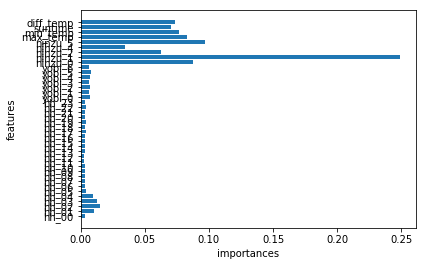

In [97]:
#各特徴量の重要度を可視化
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
 
def plot_feature_importances(model):
  n_features = X_resampled.data.shape[1] # 全説明変数
  plt.barh(range(n_features), model.feature_importances_, align='center') # 描画する際の枠組みを設定
  plt.yticks(np.arange(n_features), x.columns) # 縦軸の設定
  plt.xlabel('importances') # 横軸の設定
  plt.ylabel('features') # 縦軸の設定
  plt.show()

#実行
plot_feature_importances(clf)
 

In [47]:
#精度の追求
#アンサンブル学習(Voting )
# voting に使う分類器を用意する
from collections import defaultdict

import numpy as np
from tqdm import tqdm
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

def main():
  X = X_resampled
  y = y_resampled

  estimators = [
    ('svm', SVC(gamma='scale', probability=True)),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('logit', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
  ]

  accs = defaultdict(list)
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  for train_index, test_index in tqdm(list(skf.split(X, y))):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 分類器に重みをつける
    voting = VotingClassifier(estimators,weights=[1,3,1,1,1])
    voting.fit(X_train, y_train)

    y_pred = voting.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs['voting'].append(acc)

    for name, estimator in voting.named_estimators_.items():
      y_pred = estimator.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      accs[name].append(acc)

  for name, acc_list in accs.items():
      mean_acc = np.array(acc_list).mean()
      print(name,':正解率 = ', mean_acc)
      print(name,":真陽性率 = ",recall_score(y_test, y_pred))
      print(name,":適合率 = ",precision_score(y_test, y_pred))
      
if __name__ == '__main__':
  main()

100%|██████████| 5/5 [01:59<00:00, 24.07s/it]

voting :正解率 =  0.8773769761745716
voting :真陽性率 =  0.9248496993987976
voting :適合率 =  0.8406193078324226
svm :正解率 =  0.877477176575373
svm :真陽性率 =  0.9248496993987976
svm :適合率 =  0.8406193078324226
rf :正解率 =  0.8757740706638503
rf :真陽性率 =  0.9248496993987976
rf :適合率 =  0.8406193078324226
logit :正解率 =  0.8774773771767759
logit :真陽性率 =  0.9248496993987976
logit :適合率 =  0.8406193078324226
knn :正解率 =  0.8647549352960174
knn :真陽性率 =  0.9248496993987976
knn :適合率 =  0.8406193078324226
nb :正解率 =  0.8786794810842908
nb :真陽性率 =  0.9248496993987976
nb :適合率 =  0.8406193078324226


In [0]:
#再データフレーム化
X_resampled2 = pd.DataFrame(X_resampled,columns=["hh_00","hh_01","hh_02","hh_03","hh_04","hh_05","hh_06","hh_07","hh_08","hh_09","hh_10","hh_11",
                                                 "hh_12","hh_13","hh_14","hh_15","hh_16","hh_17","hh_18","hh_19","hh_20","hh_21","hh_22","hh_23",
                                                 "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6",
                                                 "ninzu_0","ninzu_1","ninzu_2","ninzu_4","ninzu_5","max_temp","min_temp","suntime","diff_temp"])
y_resampled2 = pd.DataFrame(y_resampled,columns=["flg"])

resmp_df = pd.concat([X_resampled2, y_resampled2],axis=1).reset_index(drop=True)
resmp_df.to_csv("./drive/My Drive/TrainAccident/AccidentResample.csv",index=False)

In [0]:
# pickleでモデルを保存
import pickle

filename = './drive/My Drive/TrainAccident/Accident_RFC_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [100]:
#保存したモデルをロードする(RFC)
filename = './drive/My Drive/TrainAccident/Accident_RFC_model.sav'
loaded_RFC_model = pickle.load(open(filename, 'rb'))
result = loaded_RFC_model.score(X_resampled, y_resampled)
print(result)

0.8807854137447405
